In [88]:
import pandas as pd
import numpy as np
import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import math
import seaborn as sns
import itertools

In [9]:
results_cross = pd.read_csv('experiment_cross_construct_impure_results.csv')
results_intra = pd.read_csv('experiment_intra_construct_impure_results.csv')
results_latent = pd.read_csv('experiment_latent_measure_impure_results.csv')

wish_results_cross = pd.read_csv('wishart_experiment_cross_construct_impure_results.csv')
wish_results_intra = pd.read_csv('wishart_experiment_intra_construct_impure_results.csv')
wish_results_latent = pd.read_csv('wishart_experiment_latent_measure_impure_results.csv')

In [10]:
def sens_and_spec(df):
    sensitivity = df['truepos'] / (df['truepos'] + df['falseneg'])
    specificity = df['trueneg'] / (df['trueneg'] + df['falsepos'])

    sensitivity[np.isnan(sensitivity)] = 0
    specificity[np.isnan(specificity)] = 0
    return(sensitivity, specificity)

def KME_mean(df):
    df_mean = df.groupby(['b','d','KME','E','K','n_samples','n_distributions']).mean()
    df_mean.insert(1, 'acc_std', df.groupby(['b','d','KME','E','K','n_samples','n_distributions'])[['score']].std())
    df_mean = df_mean.reset_index()
    return(df_mean)

def wish_mean(df):
    df_mean = df.groupby(['b','d','n_samples']).mean()
    df_mean.insert(2, 'acc_std', df.groupby(['b','d','n_samples'])[['accuracy']].std())
    df_mean = df_mean.reset_index()
    return(df_mean)
    

In [11]:
results_cross_mean = KME_mean(results_cross)

sensitivity_cross, specificity_cross = sens_and_spec(results_cross_mean)

results_intra_mean = KME_mean(results_intra)

sensitivity_intra, specificity_intra = sens_and_spec(results_intra_mean)

results_latent_mean = KME_mean(results_latent)

sensitivity_latent, specificity_latent = sens_and_spec(results_latent_mean)


In [12]:
wish_results_lin_cross = wish_results_cross[wish_results_cross['linear'] == True] 
wish_results_nonlin_cross = wish_results_cross[wish_results_cross['linear'] == False] 

wish_results_lin_cross_mean = wish_mean(wish_results_lin_cross)
wish_results_nonlin_cross_mean = wish_mean(wish_results_nonlin_cross)

sensitivity_wish_lin_cross, specificity_wish_lin_cross = sens_and_spec(wish_results_lin_cross_mean)
sensitivity_wish_nonlin_cross, specificity_wish_nonlin_cross = sens_and_spec(wish_results_nonlin_cross_mean)

In [13]:
wish_results_lin_intra = wish_results_intra[wish_results_intra['linear'] == True] 
wish_results_nonlin_intra = wish_results_intra[wish_results_intra['linear'] == False] 

wish_results_lin_intra_mean = wish_mean(wish_results_lin_intra)
wish_results_nonlin_intra_mean = wish_mean(wish_results_nonlin_intra)

sensitivity_wish_lin_intra, specificity_wish_lin_intra = sens_and_spec(wish_results_lin_intra_mean)
sensitivity_wish_nonlin_intra, specificity_wish_nonlin_intra = sens_and_spec(wish_results_nonlin_intra_mean)

In [14]:
wish_results_lin_latent = wish_results_latent[wish_results_latent['linear'] == True] 
wish_results_nonlin_latent = wish_results_latent[wish_results_latent['linear'] == False] 

wish_results_lin_latent_mean = wish_mean(wish_results_lin_latent)
wish_results_nonlin_latent_mean = wish_mean(wish_results_nonlin_latent)

sensitivity_wish_lin_latent, specificity_wish_lin_latent = sens_and_spec(wish_results_lin_latent_mean)
sensitivity_wish_nonlin_latent, specificity_wish_nonlin_latent = sens_and_spec(wish_results_nonlin_latent_mean)

In [163]:
def plot_nsamples_sns(df):
    fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8,8))
    #fig.subplots_adjust(hspace = 1.2, wspace=1.2)

    axs = axs.ravel()

    for n, samples in enumerate(df['n_samples'].unique()):
        sens, spec = sens_and_spec(df[df['n_samples'] == samples])

        sns.scatterplot(x=spec, y=sens, ax=axs[n])
        axs[n].set_title('Sample size {}'.format(samples))
        axs[n].set(xlabel = 'Specificity', ylabel = 'Sensitivity')
        axs[n].set_xlim([-0.05,1.05])
        axs[n].set_ylim([-0.05,1.05])

        plt.xlabel('Specificity')
        plt.ylabel('Sensitivity')
    
    plt.style.use('fivethirtyeight')

    plt.show
    
def plot_nsamples_sns_colors_shapes(df):
    fig, axs = plt.subplots(2,2, sharex=False, sharey=False, figsize=(10,10))
    #fig.subplots_adjust(hspace = 1.2, wspace=1.2)

    axs = axs.ravel()

    for n, samples in enumerate(df['n_samples'].unique()):
        new_df = df[df['n_samples'] == samples]
        sens, spec = sens_and_spec(new_df)

        sns.scatterplot(x=spec, y=sens, ax=axs[n], hue=new_df['K'],style=new_df['E'])
        axs[n].set_title('Sample size {}'.format(samples))
        axs[n].set(xlabel = 'Specificity', ylabel = 'Sensitivity')
        #axs[n].set_xlim([-0.05,1.05])
        #axs[n].set_ylim([-0.05,1.05])

        plt.xlabel('Specificity')
        plt.ylabel('Sensitivity')
    
    plt.style.use('fivethirtyeight')

    plt.show
    
def plot_nsamples_sns_colors(df):
    fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8,8))
    #fig.subplots_adjust(hspace = 1.2, wspace=1.2)

    axs = axs.ravel()

    for n, samples in enumerate(df['n_samples'].unique()):
        new_df = df[df['n_samples'] == samples]
        sens, spec = sens_and_spec(new_df)

        sns.scatterplot(x=spec, y=sens, ax=axs[n], hue=new_df['n_distributions'])
        axs[n].set_title('Sample size {}'.format(samples))
        axs[n].set(xlabel = 'Specificity', ylabel = 'Sensitivity')
        #axs[n].set_xlim([-0.05,1.05])
        #axs[n].set_ylim([-0.05,1.05])

        plt.xlabel('Specificity')
        plt.ylabel('Sensitivity')
    
    plt.style.use('fivethirtyeight')

    plt.show
    
def plot_nsamples_sns_combinations(df):
    fig, axs = plt.subplots(3,3, sharex=True, sharey=True, figsize=(12,12))
    #fig.subplots_adjust(hspace = 1.2, wspace=1.2)

    axs = axs.ravel()
    
    combinations = itertools.product(df['K'].unique(), df['n_distributions'].unique())

    for n, comb in enumerate(combinations):
        K, n_dist = comb
        new_df = df[(df['K'] == K) & (df['n_distributions'] == n_dist)]
        sens, spec = sens_and_spec(new_df)

        sns.scatterplot(x=spec, y=sens, ax=axs[n], hue=new_df['n_samples'], palette="tab10")
        axs[n].set_title('W: {} and n_dist: {}'.format(K, n_dist))
        axs[n].set(xlabel = 'Specificity', ylabel = 'Sensitivity')
        axs[n].set_xlim([0.2,0.9])
        axs[n].set_ylim([-0.02,0.02])

        plt.xlabel('Specificity')
        plt.ylabel('Sensitivity')
    
    plt.style.use('fivethirtyeight')

    plt.show
    
def plot_nsamples(df):
    fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8,8))
    #fig.subplots_adjust(hspace = 1.2, wspace=1.2)

    axs = axs.ravel()
    itertools.c
    for n, samples in enumerate(df['n_samples'].unique()):
        sens, spec = sens_and_spec(df[df['n_samples'] == samples])

        axs[n].scatter(spec, sens, c='r')
        axs[n].set_title('Sample size {}'.format(samples))
        axs[n].set(xlabel = 'Specificity', ylabel = 'Sensitivity')
        #axs[n].set_xlim([0,1])
        axs[n].set_ylim([0,1])

        plt.xlabel('Specificity')
        plt.ylabel('Sensitivity')
    
    plt.style.use('fivethirtyeight')

    plt.show

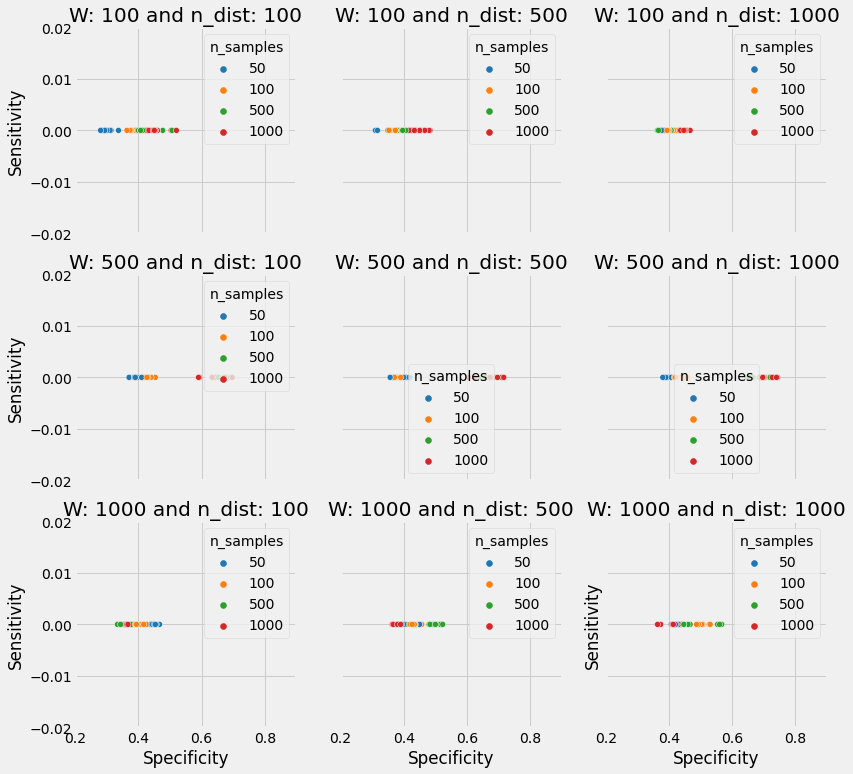

In [164]:
plot_nsamples_sns_combinations(results_cross_mean)

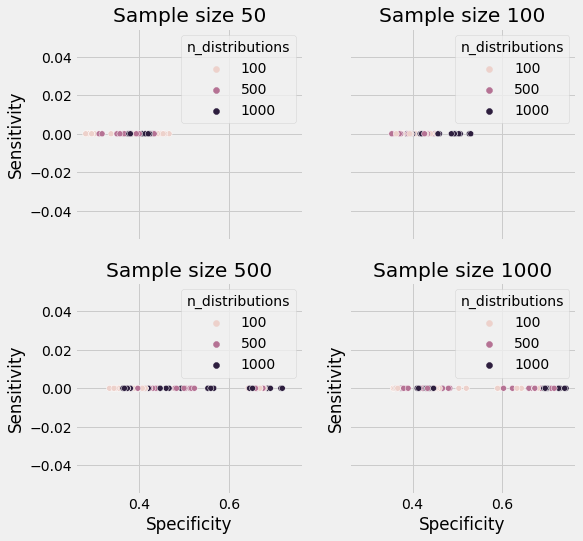

In [161]:
plot_nsamples_sns_colors(results_cross_mean)

### Effect of n_distributions

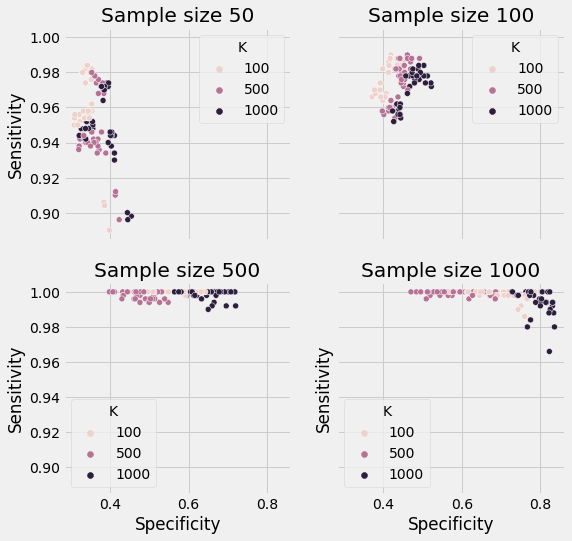

In [68]:
plot_nsamples_sns_colors(results_latent_mean)

### Comparison of cross impure scores

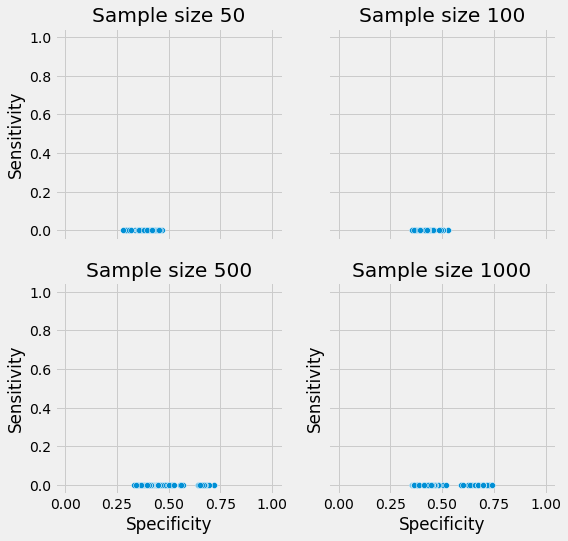

In [22]:
plot_nsamples_sns(results_cross_mean)

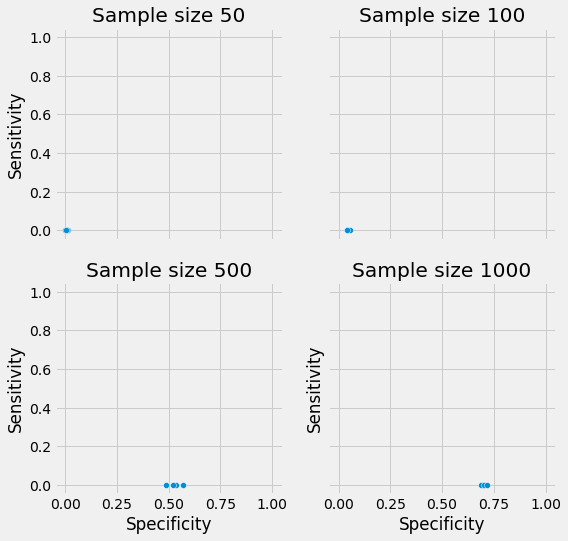

In [23]:
plot_nsamples_sns(wish_results_nonlin_cross_mean)

### Comparison of intra impure scores

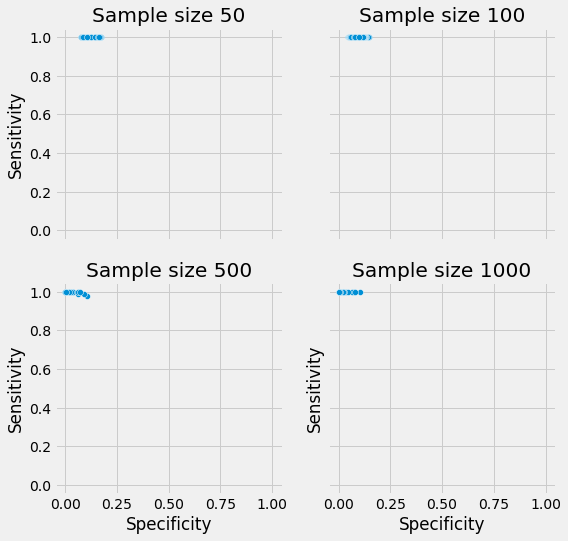

In [17]:
plot_nsamples_sns(results_intra_mean)

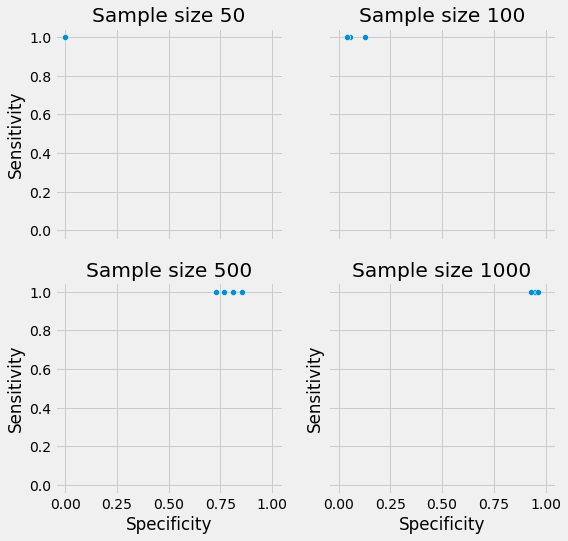

In [24]:
plot_nsamples_sns(wish_results_nonlin_intra_mean)

### Comparison of latent impure scores

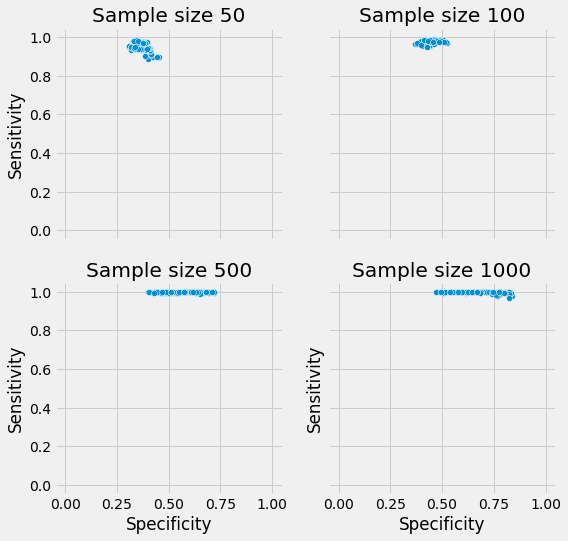

In [18]:
plot_nsamples_sns(results_latent_mean)

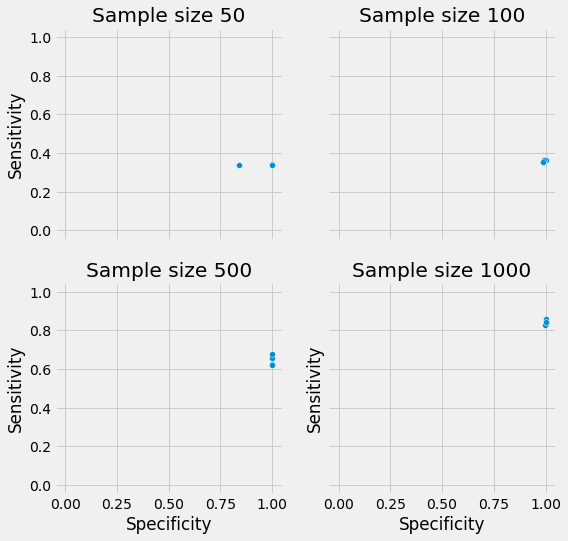

In [21]:
plot_nsamples_sns(wish_results_nonlin_latent_mean)